## Iris Dataset

In [42]:
path = r'/workspaces/iris-Streamlit-Deployment-/notebook/iris 1.csv'

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sna

In [44]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv(path)

In [46]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
df.shape

(150, 5)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [50]:
df.duplicated().sum()

np.int64(1)

In [51]:
df.shape

(150, 5)

In [52]:
df.drop_duplicates(keep='first', ignore_index=True, inplace=True)


## SEPRATION OF X & Y

In [53]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [54]:
x = df.drop(['species'], axis=1)
y = df['species']

In [55]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

## PIPELINE CREATION

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test , y_train , y_test = train_test_split(x , y , test_size = 0.15 , random_state = 5)

In [59]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(126, 4) (126,)
(23, 4) (23,)


In [60]:
a= y.value_counts()
a

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


In [64]:
model = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   
    ('scaler', StandardScaler())  ,
    ('model' , LogisticRegression())                     
])

In [65]:
model.fit(x_train , y_train)

,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [68]:
model.score(x_train , y_train)

0.9682539682539683

In [69]:
model.score(x_test , y_test)

0.9565217391304348

## CROSS VALIDATION SCORE

In [72]:
from sklearn.model_selection import cross_val_score


In [75]:
cv = cross_val_score(model , x_train , y_train , cv = 5 , n_jobs = -1)

In [76]:
cv

array([0.96153846, 0.96      , 0.96      , 0.92      , 0.96      ])

In [77]:
cv.mean()

np.float64(0.9523076923076923)

## Model Evaluation

In [85]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


## Training Evaluation

In [86]:
train_pred = model.predict(x_train)

In [87]:
print(classification_report(y_train , train_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        42
  versicolor       0.95      0.95      0.95        44
   virginica       0.95      0.95      0.95        40

    accuracy                           0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126



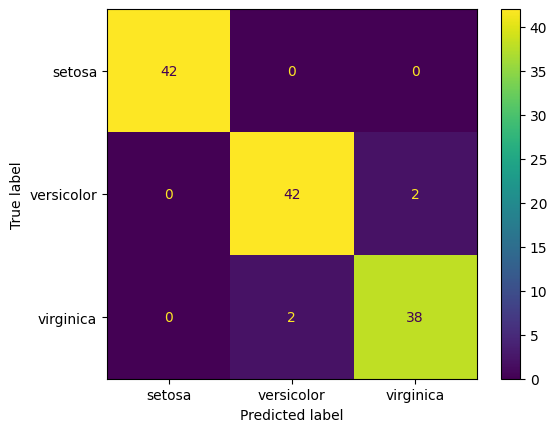

In [88]:
ConfusionMatrixDisplay.from_estimator(model, x_train, y_train)

## Testing Evaluation

In [90]:
test_pred = model.predict(x_test)


In [94]:
print(classification_report(y_test , test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.83      0.91         6
   virginica       0.90      1.00      0.95         9

    accuracy                           0.96        23
   macro avg       0.97      0.94      0.95        23
weighted avg       0.96      0.96      0.96        23



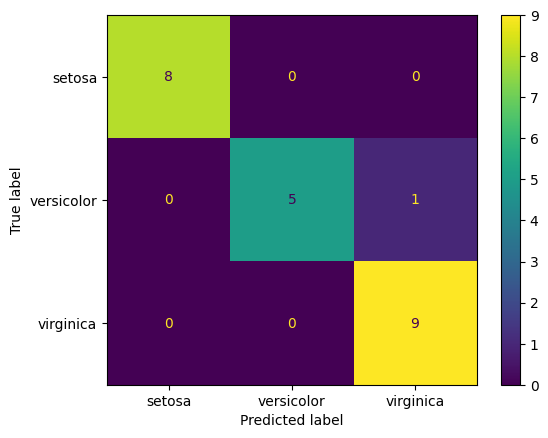

In [91]:
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)

From above 

In [95]:
## Save this model using joblib library

In [96]:
import joblib

In [101]:
joblib.dump(model , "iris_model.joblib")

['iris_model.joblib']

In [102]:
m  = joblib.load('iris_model.joblib')

In [103]:
m.score(x_train , y_train)

0.9682539682539683

In [104]:
m.predict(x_train)

array(['versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       

In [105]:
m.predict(x_test)

array(['virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa'], dtype=object)